In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3, 4]].values

In [5]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

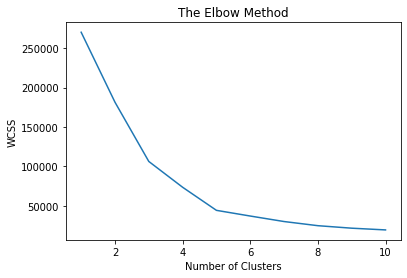

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [8]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

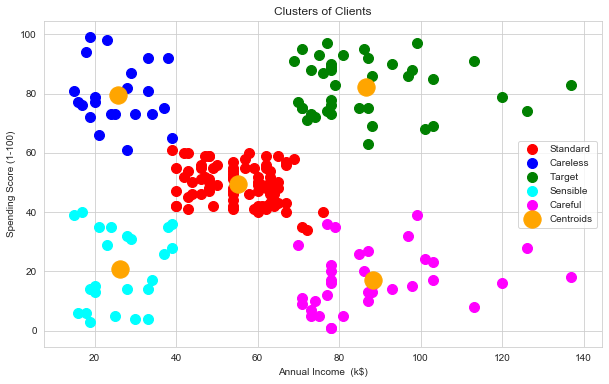

In [11]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, color='red', label='Standard')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, color='blue', label='Careless')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, color='green', label='Target')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, color='cyan', label='Sensible')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, color='magenta', label='Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, color='orange', label='Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income  (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()